# Instagram Influencers

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Loading Dataset

In [3]:
# load the data
df=pd.read_csv("C:\\Users\\Anjali\\Downloads\\Influencer.csv")
df.sample(5)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
15,16,\nvirat.kohli,87,215.9m,3.5m,1.4k,0.013,2.7m,5.0b,NaN
108,109,\npaulodybala,85,49.0m,1.8m,1.3k,0.021,1.0m,2.3b,NaN
33,34,\ngal_gadot,85,88.0m,1.4m,1.7k,0.008,735.9k,2.3b,United States
66,67,\nwillsmith,82,63.4m,1.4m,1.4k,0.016,1.0m,1.9b,United States
153,154,\nandresiniesta8,85,40.3m,250.8k,2.0k,0.004,161.7k,508.8m,Spain


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

# Data Cleaning

In [6]:
df['Channel Info'] = df['Channel Info'].str.replace('\n','')
df.sample(5)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
103,104,blackpinkofficial,85,49.9m,2.1m,1.6k,0.027,1.4m,3.3b,NaN
97,98,hudabeauty,82,51.2m,180.9k,2.4k,0.001,40.9k,442.2m,United States
96,97,thv,83,51.7m,15.4m,69,0.250,12.9m,1.1b,NaN
181,182,toni.krs,83,35.6m,597.8k,946,0.012,432.5k,565.5m,NaN
167,168,wesleysafadao,80,37.8m,250.9k,8.9k,0.002,77.8k,2.2b,NaN


In [18]:
# Convert m,k,b numeric
number_list = ['Followers', 'Avg. Likes', 'Posts', 'New Post Avg. Likes', 'Total Likes']
tbl = {'k': 1000, 'm': 1000000, 'b': 1000000000}
for col in number_list:
    lst = df[col]
    df[col] = [int(re.sub(r'([\d\.]+)(k|m|b)', lambda v: str(int(float(v.groups()[0]) * tbl[v.groups()[1]])), str(val))) for val in lst]

In [25]:
df[df['Country Or Region']=='United States']

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
1,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,57400000000,United States
3,4,selenagomez,93,348800000,6100000,1900,0.005,1700000,11400000000,United States
4,5,therock,91,339400000,1800000,6800,0.003,932000,12600000000,United States
5,6,arianagrande,92,333000000,3700000,5000,0.009,3100000,18500000000,United States
6,7,kimkardashian,91,330700000,3500000,5700,0.005,1700000,19800000000,United States
...,...,...,...,...,...,...,...,...,...,...
178,179,blakelively,80,35900000,3100000,120,0.040,1400000,366100000,United States
183,184,barackobama,81,35400000,1100000,682,0.012,411500,758400000,United States
187,188,disney,77,34700000,185200,7500,0.004,132000,1400000000,United States
188,189,shaymitchell,83,34500000,715400,6300,0.006,198700,4500000000,United States


In [23]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000,8700000,3400,0.013,6300000,29100000000,Spain
1,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,57400000000,United States
2,3,leomessi,90,363900000,6700000,915,0.010,3500000,6100000000,NaN
3,4,selenagomez,93,348800000,6100000,1900,0.005,1700000,11400000000,United States
4,5,therock,91,339400000,1800000,6800,0.003,932000,12600000000,United States


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,200.0,1.005000e+02,5.787918e+01,1.0,5.075000e+01,1.005000e+02,1.502500e+02,2.000000e+02
Influence Score,200.0,8.185000e+01,8.875323e+00,22.0,8.000000e+01,8.400000e+01,8.600000e+01,9.300000e+01
Followers,200.0,7.849100e+07,7.492015e+07,33400000.0,4.067500e+07,5.095000e+07,7.050000e+07,4.852000e+08
Avg. Likes,200.0,1.785050e+06,2.192133e+06,63500.0,4.990500e+05,1.100000e+06,2.125000e+06,1.540000e+07
Posts,200.0,3.460425e+03,3.327882e+03,20.0,9.382500e+02,2.100000e+03,5.025000e+03,1.690000e+04
60-Day Eng Rate,200.0,1.916000e-02,3.257731e-02,0.0,4.000000e-03,9.500000e-03,1.725000e-02,2.500000e-01
New Post Avg. Likes,200.0,1.224083e+06,1.857624e+06,0.0,2.187750e+05,5.671500e+05,1.300000e+06,1.290000e+07
Total Likes,200.0,3.644949e+09,5.563069e+09,22800000.0,1.075000e+09,2.050000e+09,4.025000e+09,5.740000e+10


# 1.Are there any correlated features in the given dataset? If yes, state the correlation




# coefficient of the pair of features which are highly correlated.

In [22]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Find highly correlated feature pairs
highly_correlated = correlation_matrix[abs(correlation_matrix) > 0.7].stack().drop_duplicates()

# Print the highly correlated feature pairs and their correlation coefficients
print("Highly correlated features:")
for (feature1, feature2), correlation in highly_correlated.items():
    if feature1 != feature2:
        print(f"{feature1} - {feature2}: {correlation}")

ValueError: could not convert string to float: 'Spain'

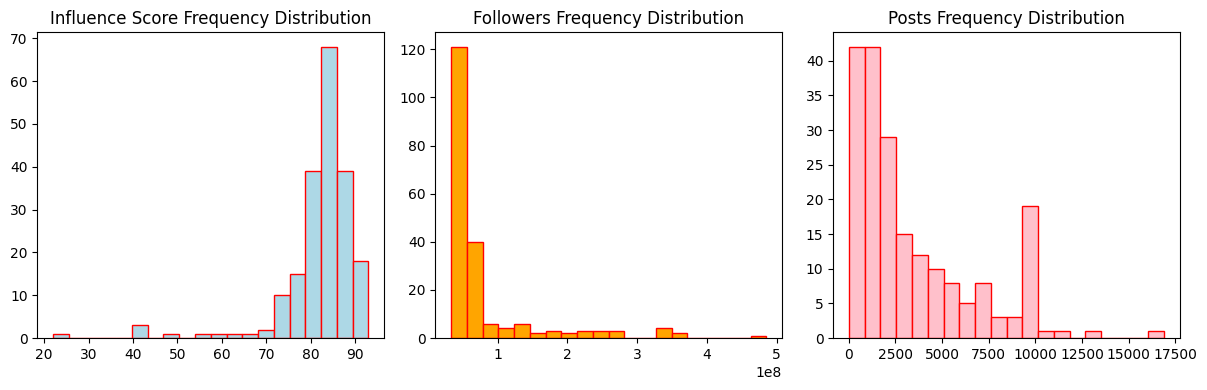

In [26]:
#  Frequency distribution
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
features = ['Influence Score', 'Followers', 'Posts']
colors = ['lightblue', 'orange', 'pink']

for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(df[feature], bins=20, color=colors[i], ec='red')
    ax.set_title(f'{feature} Frequency Distribution')
plt.tight_layout()
plt.show()

# 3. Which country houses the highest number of Instagram Influencers? Please show the




# count of Instagram influencers in different countries using barchart

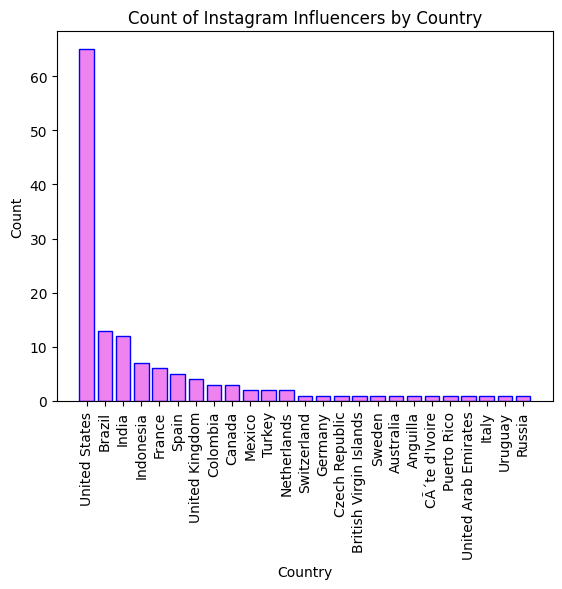

In [27]:
# Count of influencers by country
country_counts = df['Country Or Region'].value_counts()
plt.bar(country_counts.index, country_counts.values, color='violet', ec='blue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Instagram Influencers by Country')
plt.xticks(rotation=90)
plt.show()

# 4. Who are the top 10 influencers in the given dataset based on the following features

Top 10 Followers

C:\Users\Anjali\AppData\Local\Temp\ipykernel_19428\1820960095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfi, y="Channel Info", x="Followers", palette="Spectral")


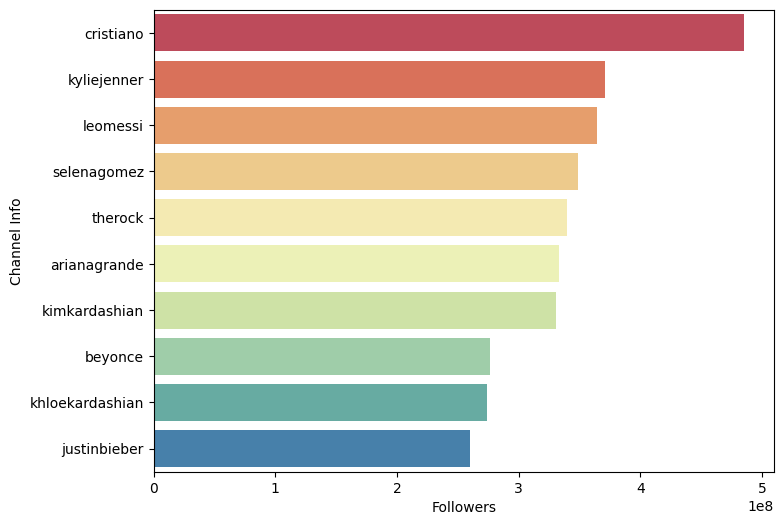

In [28]:
# Top 10 Followers
dfi = df.loc[:9]
plt.figure(figsize=(8,6))
sns.barplot(data=dfi, y="Channel Info", x="Followers", palette="Spectral")
None

# Top 10 Average Likes

C:\Users\Anjali\AppData\Local\Temp\ipykernel_19428\45354444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfx, y="Channel Info", x='Avg. Likes', palette="flare")


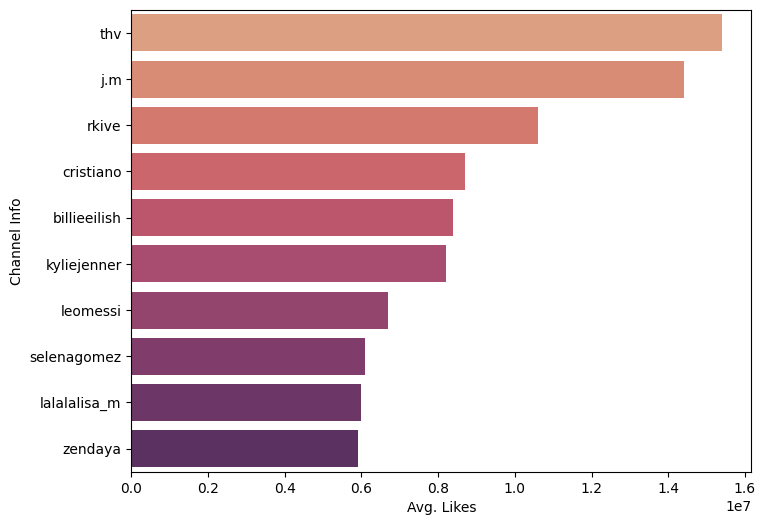

In [29]:
# Top 10 Averag Likes
dfx = df.sort_values(by='Avg. Likes' , ascending=False)[0:10]
plt.figure(figsize=(8,6))
sns.barplot(data=dfx, y="Channel Info", x='Avg. Likes', palette="flare")
None

# Top 10 Total Likes

C:\Users\Anjali\AppData\Local\Temp\ipykernel_19428\1376896593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfx, y="Channel Info", x='Total Likes', palette="magma")


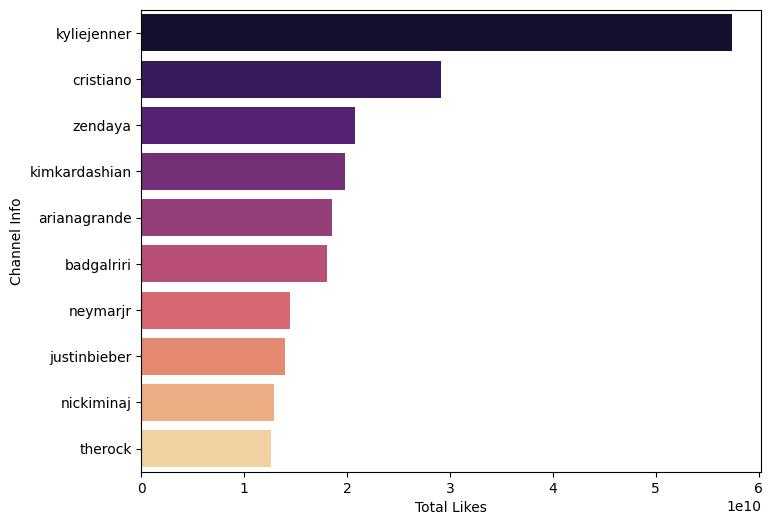

In [30]:
#  Top  10 Total Likes
dfx = df.sort_values(by='Total Likes' , ascending=False)[0:10]
plt.figure(figsize=(8,6))
sns.barplot(data=dfx, y="Channel Info", x='Total Likes', palette="magma")
None


5. Describe the relationship between the following pairs of features using a suitable graph
● Followers and Total Likes
● Followers and Influence Score
● Posts and Average likes
● Posts and Influence Score

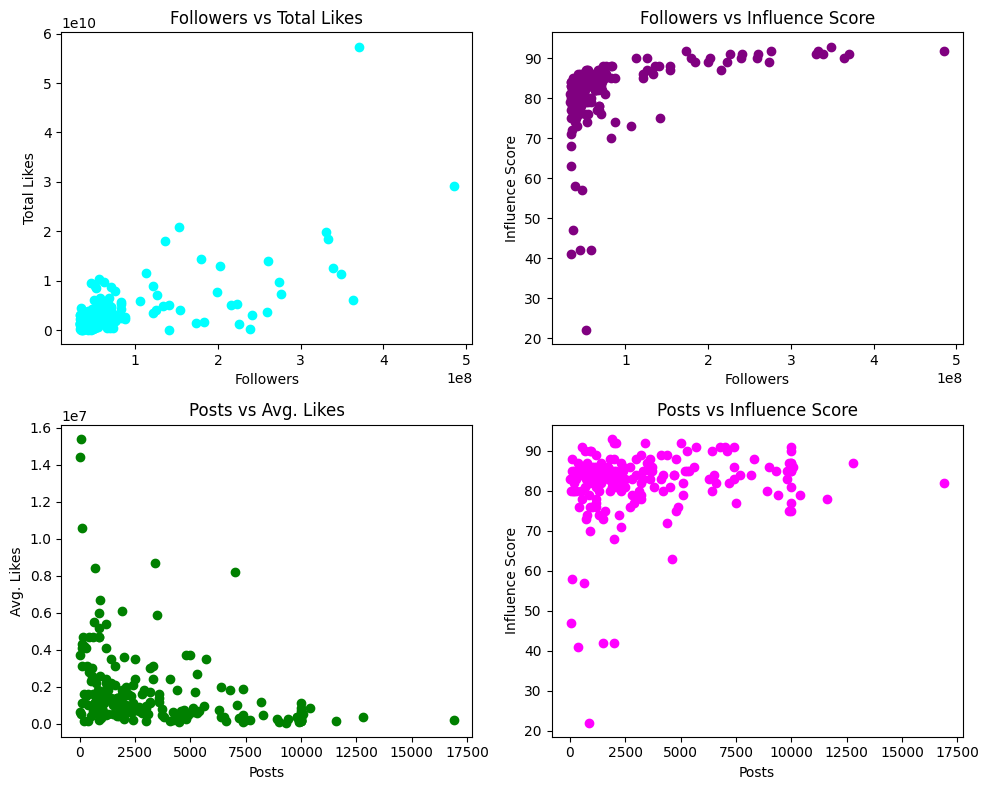

In [31]:
#  Relationship between pairs of features
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
features_pairs = [('Followers', 'Total Likes'),
                 ('Followers', 'Influence Score'),
                 ('Posts', 'Avg. Likes'),
                 ('Posts', 'Influence Score')]
colors = ['cyan', 'purple', 'green', 'magenta'] 

for i, (x, y) in enumerate(features_pairs):
    ax = axes[i // 2, i % 2]
    ax.scatter(df[x], df[y], color=colors[i])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')
plt.tight_layout()
plt.show()